# Finding Ideal Land for Farms in Areas of Drought
Research by Arman Bhalla

In [14]:
!pip install sentinelhub --upgrade

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 81kB 4.2MB/s 
    100% |████████████████████████████████| 122kB 4.8MB/s 
    100% |████████████████████████████████| 1.5MB 4.5MB/s 
    100% |████████████████████████████████| 133kB 5.2MB/s 
    100% |████████████████████████████████| 4.7MB 3.4MB/s 
    100% |████████████████████████████████| 4.4MB 5.1MB/s 
    100% |████████████████████████████████| 61kB 13.5MB/s 
    100% |████████████████████████████████| 552kB 9.1MB/s 
  Running setup.py bdist_wheel for sentinelhub ... - \ done
  Stored in directory: /root/.cache/pip/wheels/bb/be/7f/c782c07bfc14f90b9c8ea9447dc86439ada26467b8c7f4ba61
  Running setup.py bdist_wheel for utm ... - done
  Stored in directory: /root/.cache/pip/wheels/1d/2d/5a/4c6320941f607ffefd353e1bb715e33a250a59f835cf0fbdd8
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [15]:
!sentinelhub.config --show

{
  "instance_id": "",
  "aws_access_key_id": "",
  "aws_secret_access_key": "",
  "ogc_base_url": "https://services.sentinel-hub.com/ogc/",
  "gpd_base_url": "http://service.geopedia.world/",
  "aws_metadata_base_url": "https://roda.sentinel-hub.com/",
  "aws_s3_l1c_bucket": "sentinel-s2-l1c",
  "aws_s3_l2a_bucket": "sentinel-s2-l2a",
  "opensearch_url": "http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2/",
  "max_wfs_records_per_query": 100,
  "max_opensearch_records_per_query": 500,
  "default_start_date": "1985-01-01",
  "max_download_attempts": 4,
  "download_sleep_time": 5,
  "download_timeout_seconds": 120
}
Configuration file location: /usr/local/lib/python3.6/dist-packages/sentinelhub/config.json


In [16]:
!sentinelhub.config --instance_id e8a19352-2581-4ad3-9168-816b7bce2097

The value of parameter 'instance_id' was updated to 'e8a19352-2581-4ad3-9168-816b7bce2097'


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import datetime
import numpy as np

import sys
from PIL import Image

import matplotlib.pyplot as plt
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [0]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [0]:
betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

## Data Entry Point
Change your BBox to the WGS 84 co-ordinates of the area you want to analyse. 
This is a helpful tool to get this info: https://epsg.io/map#srs=4326&x=0.000000&y=0.000000&z=1&layer=streets

In [0]:
# testing different coordinate system thing
# bounds = [35.16, -15.15, 35.51]
#bounds_bbox = BBox(bbox=bounds, crs=CRS.WGS84)
wms_ndwi_req = WmsRequest(layer='NDWI',
                                    bbox=betsiboka_bbox,
#                                     time='2017-12-15',
                                    width=512, height=856,
                                    instance_id="e8a19352-2581-4ad3-9168-816b7bce2097")
wms_vegetation_req = WmsRequest(layer='NDVI',
                                    bbox=betsiboka_bbox,
#                                     time='2017-12-15',
                                    width=512, height=856,
                                    instance_id="e8a19352-2581-4ad3-9168-816b7bce2097")
wms_ndwi = wms_ndwi_req.get_data()
wms_vegetation = wms_vegetation_req.get_data()

In [24]:
print(wms_vegetation)
print(wms_ndwi)

[array([[  0,   0,   0, ...,  68,  30,  32],
       [  0,   0,   0, ...,  53,  34,  22],
       [  0,   0,   0, ...,  90,  60,  30],
       ...,
       [ 41,  83,  29, ...,  26,  34,  25],
       [107,  56,  55, ...,  27,  28,  43],
       [111,  80,  30, ...,  31,  59,  42]], dtype=uint8)]
[array([[86, 89, 85, ...,  0,  0,  0],
       [82, 87, 86, ...,  0,  0,  0],
       [89, 88, 88, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)]


In [25]:
print(wms_vegetation[0]+wms_ndwi[0])
# The sum of vegetation and true colour images
sum = wms_vegetation[0]+wms_ndwi[0]

[[ 86  89  85 ...  68  30  32]
 [ 82  87  86 ...  53  34  22]
 [ 89  88  88 ...  90  60  30]
 ...
 [ 41  83  29 ...  26  34  25]
 [107  56  55 ...  27  28  43]
 [111  80  30 ...  31  59  42]]


Fig 1: NDWI WATER SCALE, the darker, the better
Fig 2: NDVI VEGETATION SCALE, the more concentrated, the better
Fig 3: SUPERIMPOSED UPON EACH OTHER, more concentrated + more dark the better


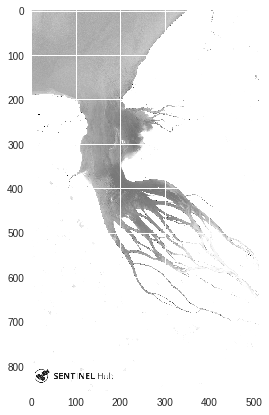

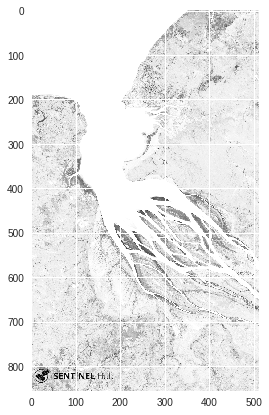

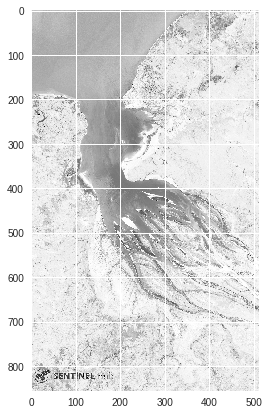

In [30]:
#print('Returned data is of type = %s and length %d.' % (type(wms_ndwi), len(wms_ndwi)))
#print('Single element in the list is of type {} and has shape {}'.format(type(wms_ndwi[-1]), wms_ndwi[-1].shape))
print("Fig 1: NDWI WATER SCALE, the darker, the better")
plot_image(wms_ndwi[-1]) # water
print("Fig 2: NDVI VEGETATION SCALE, the more concentrated, the better")
plot_image(wms_vegetation[-1]) #vegetation
print("Fig 3: SUPERIMPOSED UPON EACH OTHER, more concentrated + more dark the better")
plot_image(sum)

In [31]:
!pip install weather-api

# Data Entry Point
Enter the long and lat from the darkest point which is NOT sea and is within your plot of land from above.
Ideally there would be a method to do this automatically, but due to time constraints, I've not implemented this.

In [32]:
from weather import Weather, Unit
weather = Weather(Unit.CELSIUS)
#enter the lat and long NOT IN WGS 84 EPSG PROJECTION SYSTEM. JUST NORMAL LATITUDE AND LONGITUDE OF THE SITE YOU FIND OUT
lookup = weather.lookup_by_latlng(53.3494,-6.2601)
condition = lookup.condition
forecasts = lookup.forecast
avg_highlow_delta = 0
for forecast in forecasts:
#     print(forecast.text)
#     print(forecast.date)
#     print(forecast.high)
#     print(forecast.low)
    avg_highlow_delta += int(forecast.high) + int(forecast.low)
# average it over the number of forecasts
avg_highlow_delta/=7
print(avg_highlow_delta)

22.285714285714285


This is where we start to use the data from the weather and the NDWI water scale and NDVI scale plot.

In [0]:
import scipy, sklearn
import numpy as np
from sklearn import tree

INPUT:  * The longitude (x axis of the superimposed plot) and latitude (y axis of the superimposed plot)
              * Weather avg_highlow_delta
              * region number (to-do)